In [1]:
import numpy as np
import torch
import pyro
import pyro.distributions as dist
import networkx as nx
import matplotlib.pylab as plt

In [2]:
n_vertices = 20

In [3]:
n_communities = 2

In [4]:
p_community = pyro.sample('p_community', dist.Dirichlet(concentration=10*torch.ones(n_communities)))

In [5]:
p_community

tensor([0.5046, 0.4954])

In [6]:
c = dist.Categorical(probs=p_community).sample((n_vertices,))

In [7]:
c

tensor([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0])

In [8]:
p_connection = dist.Beta(.5,2.).sample((n_communities*(n_communities+1)//2,))

In [9]:
p_connection

tensor([0.0504, 0.2503, 0.2775])

In [10]:
M = torch.ones(n_communities, n_communities)

In [11]:
i,j = torch.tril_indices(n_communities, n_communities)
idxs  = np.stack([i,j])
M[idxs[0],idxs[1]] = p_connection
M[idxs[1],idxs[0]] = p_connection

In [12]:
# for each vertex, look up probability of connecting to all other vertices
tmp = M[c.repeat_interleave(n_vertices),c.repeat(n_vertices)].reshape(n_vertices,-1)
# vertices have 0 probability of connecting to themselves
tmp[torch.arange(n_vertices),torch.arange(n_vertices)] = 0

In [13]:
G = dist.Bernoulli(tmp).sample()

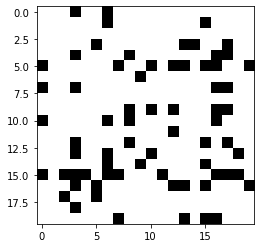

In [14]:
plt.imshow(1-G,cmap='gray')

In [15]:
graph = nx.from_numpy_array(G.numpy())

/home/folzd/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


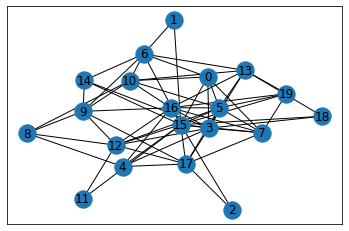

In [16]:
nx.draw_networkx(graph)